In [2]:
import pandas as pd
#import plost
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv
import os
from pydataxm import *          # Importa la libreria que fue instalada con pip install pydataxm o tambien desde GitHub
from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
import datetime as dt           # Permite trabajar con fechas 
import numpy as np              # Manipulación de datos
import matplotlib.dates as mdates
      

In [5]:
df_oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/oferta_recursos.txt', sep='\t')


# Asegúrate de que la columna 'Date' esté en formato datetime
df_oferta['Date'] = pd.to_datetime(df_oferta['Date'])

# Suma de la demanda por horas (diaria)
df_oferta['oferta_diaria'] = df_oferta.sum(axis=1, skipna=True, numeric_only=True)

In [9]:
df_2 = df_oferta

#Seleccionar el tipo de fuente enerética

df = df_2.query('Values_Type == "Hidraulica"')
df

# Agrupar por mes y sumar la demanda diaria

df_mensual = df.groupby([pd.Grouper(key='Date', freq='M'), 'Values_code'])['oferta_diaria'].sum() 

df_mensual = df_mensual.reset_index()

# Definir la región específica a seleccionar
recursos = ["2VJS", "3ENA", "3ENE", "3GPZ", "3HBN", 
            "3HF5", "3HWM", "3IZ6", "3J2B", "3IS2", 
            "3J2H", "3J4D", "3K6T", "3KJK", "3NLZ", 
            "CTG1", "CTG2", "CTG3", "EPFV", "GE32", 
            "GEC3", "MATA", "PRG1", "PRG2", "TBQ3", 
            "TBQ4", "TBST", "TCBE", "TCDT", "TFL1", 
            "TFL4", "TGJ1", "TGJ2", "TMB1","TRN1","URA1"]

# Filtrar el DataFrame por la región específica
df_recurso = df_mensual[df_mensual['Values_code'].isin(recursos)]

C:\Users\jonal\AppData\Local\Temp\ipykernel_16152\3092985493.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df.groupby([pd.Grouper(key='Date', freq='M'), 'Values_code'])['oferta_diaria'].sum()


In [15]:
df

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date,demanda_diaria,Values_Code,Values_Name,Values_Type,oferta_diaria
0,Recurso,2QBW,19444.51,19418.96,19419.11,19418.15,19413.57,19407.99,19513.87,19858.74,...,11071.29,11826.39,11829.70,11829.92,2023-12-17,392578.06,2QBW,EL POPAL,HIDRAULICA,1570312.24
1,Recurso,2QEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2023-12-17,0.00,2QEK,SALTO II,HIDRAULICA,0.00
2,Recurso,2QRL,651.36,650.85,649.62,648.81,649.95,650.04,649.53,649.83,...,648.36,647.76,647.19,648.51,2023-12-17,15580.65,2QRL,LA REBUSCA,HIDRAULICA,62322.60
3,Recurso,2QV2,15138.00,14616.00,12477.60,10792.80,10393.20,8035.20,5371.20,9208.80,...,10566.00,10562.40,10562.40,10566.00,2023-12-17,241717.38,2QV2,BAJO TULUA,HIDRAULICA,966869.52
4,Recurso,2R22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2023-12-17,0.00,2R22,LAGUNETA,HIDRAULICA,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284968,Recurso,VNTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-01-30,0.00,VNTB,VENTANA B,HIDRAULICA,0.00
284969,Recurso,ZPA2,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,...,36000.00,36000.00,36000.00,36000.00,2021-01-30,864000.00,ZPA2,ZIPAEMG 2,TERMICA,3456000.00
284970,Recurso,ZPA3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-01-30,0.00,ZPA3,ZIPAEMG 3,TERMICA,0.00
284971,Recurso,ZPA4,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,...,64000.00,64000.00,64000.00,64000.00,2021-01-30,1536000.00,ZPA4,ZIPAEMG 4,TERMICA,6144000.00


In [ ]:
df_recurso.head()

In [10]:
df_mensual.head()

,Date,Values_code,oferta_diaria
0,2021-01-31,2QBW,26123115.82
1,2021-01-31,2QEK,0.00
2,2021-01-31,2QRL,960472.38
3,2021-01-31,2QV2,18509938.26
4,2021-01-31,2R22,18701400.56


C:\Users\jonal\AppData\Local\Temp\ipykernel_16152\3202971726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recurso['Mes'] = df_recurso['Date'].dt.strftime('%Y-%m')


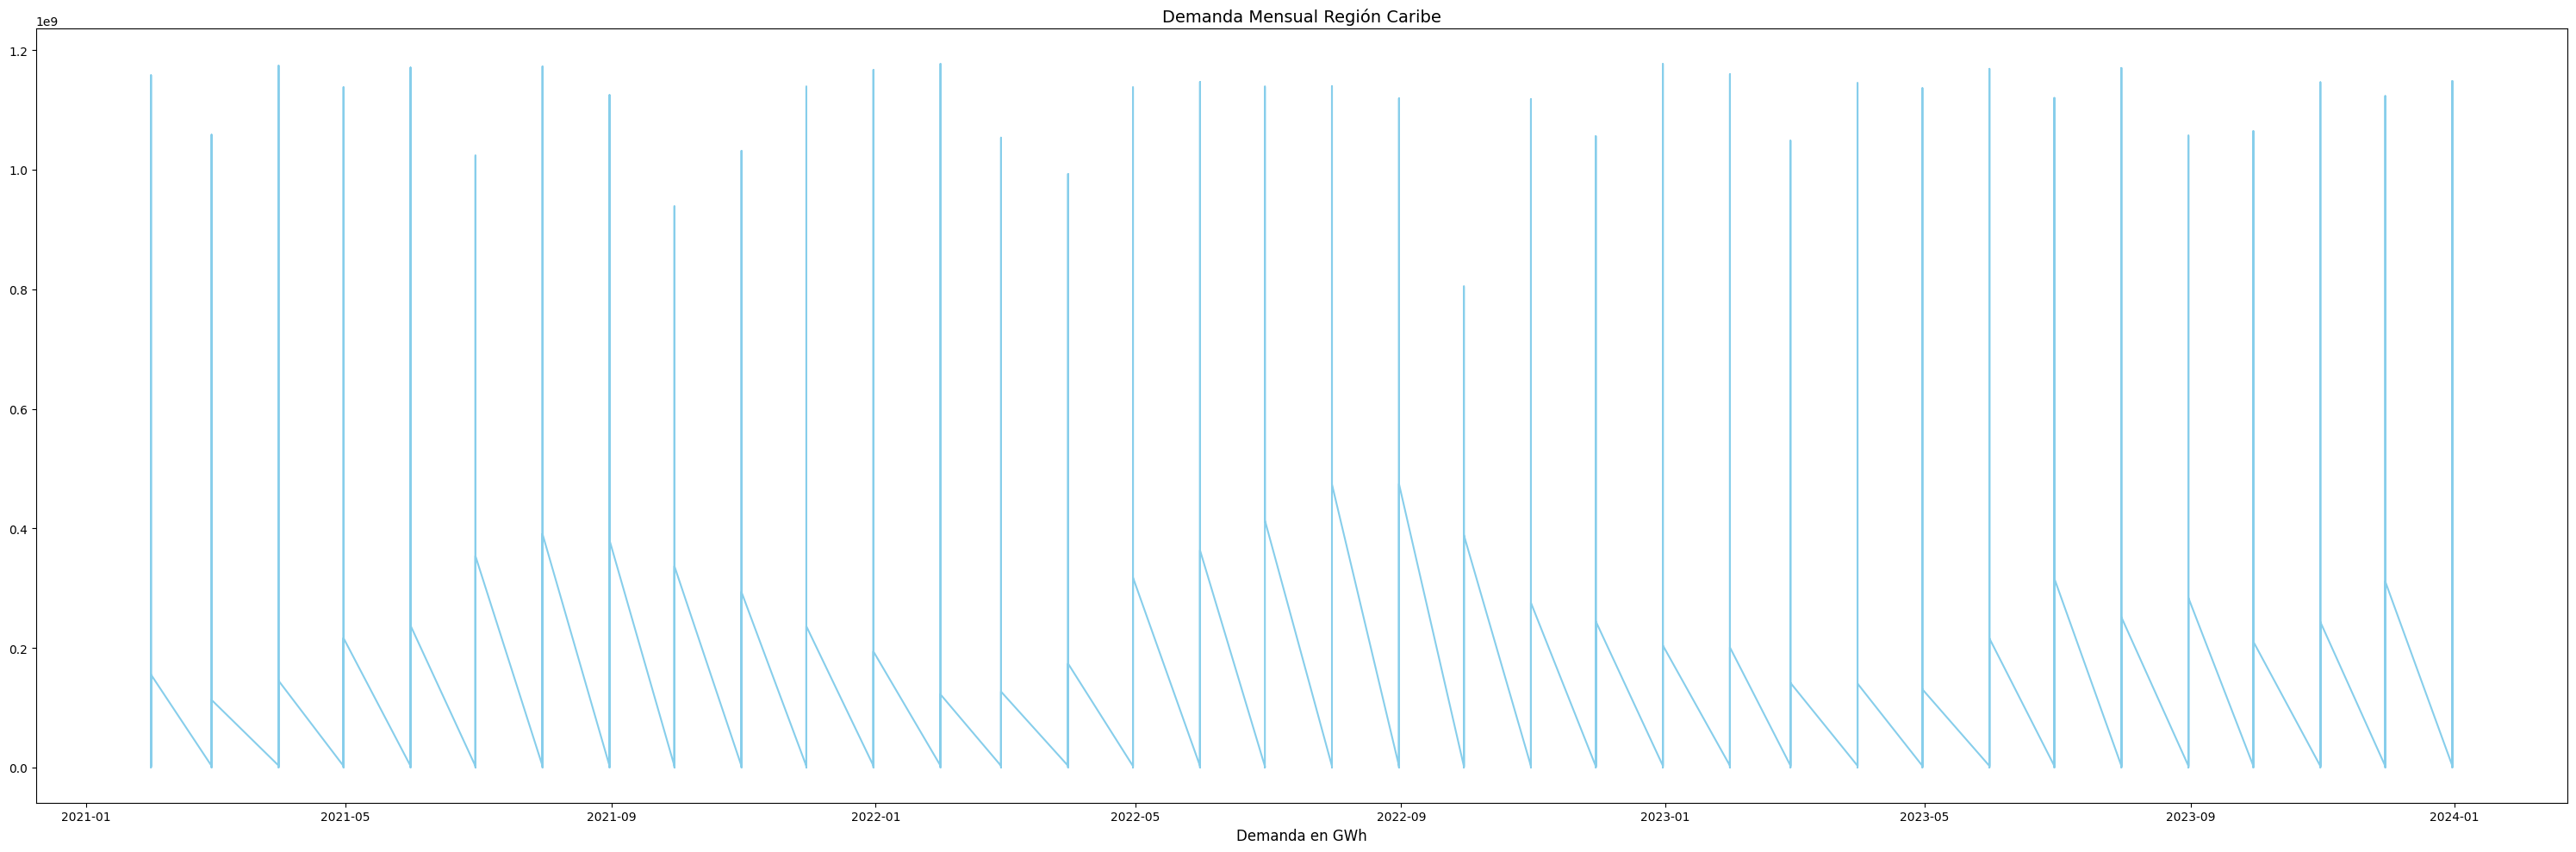

In [11]:
%matplotlib inline

#df_mensual = df_mensual.reset_index()

df_recurso['Mes'] = df_recurso['Date'].dt.strftime('%Y-%m')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(30, 10))

# Graficar la demanda mensual en un gráfico de barras horizontales
ax.plot(df_recurso['Date'], df_recurso['oferta_diaria'], color='skyblue')

# Añadir etiquetas de los ejes
ax.set_xlabel('Demanda en GWh', fontsize=12)
#ax.set_ylabel('Región', fontsize=12)

# Añadir título al gráfico
ax.set_title('Demanda Mensual Región Caribe', fontsize=14)

# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Demanda Diaria (Entre los Años 2021 y 2023)**

In [12]:
# Asegúrate de que la columna 'Date' esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Suma de la demanda por horas (diaria)
df['oferta_diaria'] = df.sum(axis=1, skipna=True, numeric_only=True)

# Agrupar por mes y sumar la demanda diaria
df_diaria = df.groupby([pd.Grouper(key='Date', freq='D'), 'Values_code'])['oferta_diaria'].sum() 

df_diaria = df_diaria.reset_index()

# Definir la región específica a seleccionar
recursos = ["2VJS", "3ENA", "3ENE", "3GPZ", "3HBN", 
            "3HF5", "3HWM", "3IZ6", "3J2B", "3IS2", "3J2H", 
            "3J4D", "3K6T", "3KJK", "3NLZ", "CTG1", "CTG2", "CTG3", 
            "EPFV", "GE32", "GEC3", "MATA", "PRG1", "PRG2", "TBQ3", 
            "TBQ4", "TBST", "TCBE", "TCDT", "TFL1", "TFL4", "TGJ1", "TGJ2", "TMB1","TRN1","URA1"]

# Filtrar el DataFrame por la región específica
df_region_diario = df_diaria[df_diaria['Values_code'].isin(recursos)]

Función Filtro de Fechas

In [13]:
# Función de filtro de fechas corregida
def fecha_t (ini, fin):
    # Filtrar el DataFrame por el rango de fechas y las regiones específicas
    df_filtrado = df_region_diario[(df_region_diario['Date'] >= ini) & 
                                   (df_region_diario['Date'] <= fin) & 
                                   (df_region_diario['Values_code'].isin(recursos))]

    # Sumar la demanda diaria de ambas regiones en cada fecha
    df_combinado = df_filtrado.groupby('Date')['oferta_diaria'].sum().reset_index()

    # Establecer 'Date' como índice
    df_combinado.set_index('Date', inplace=True)
    
    return df_combinado


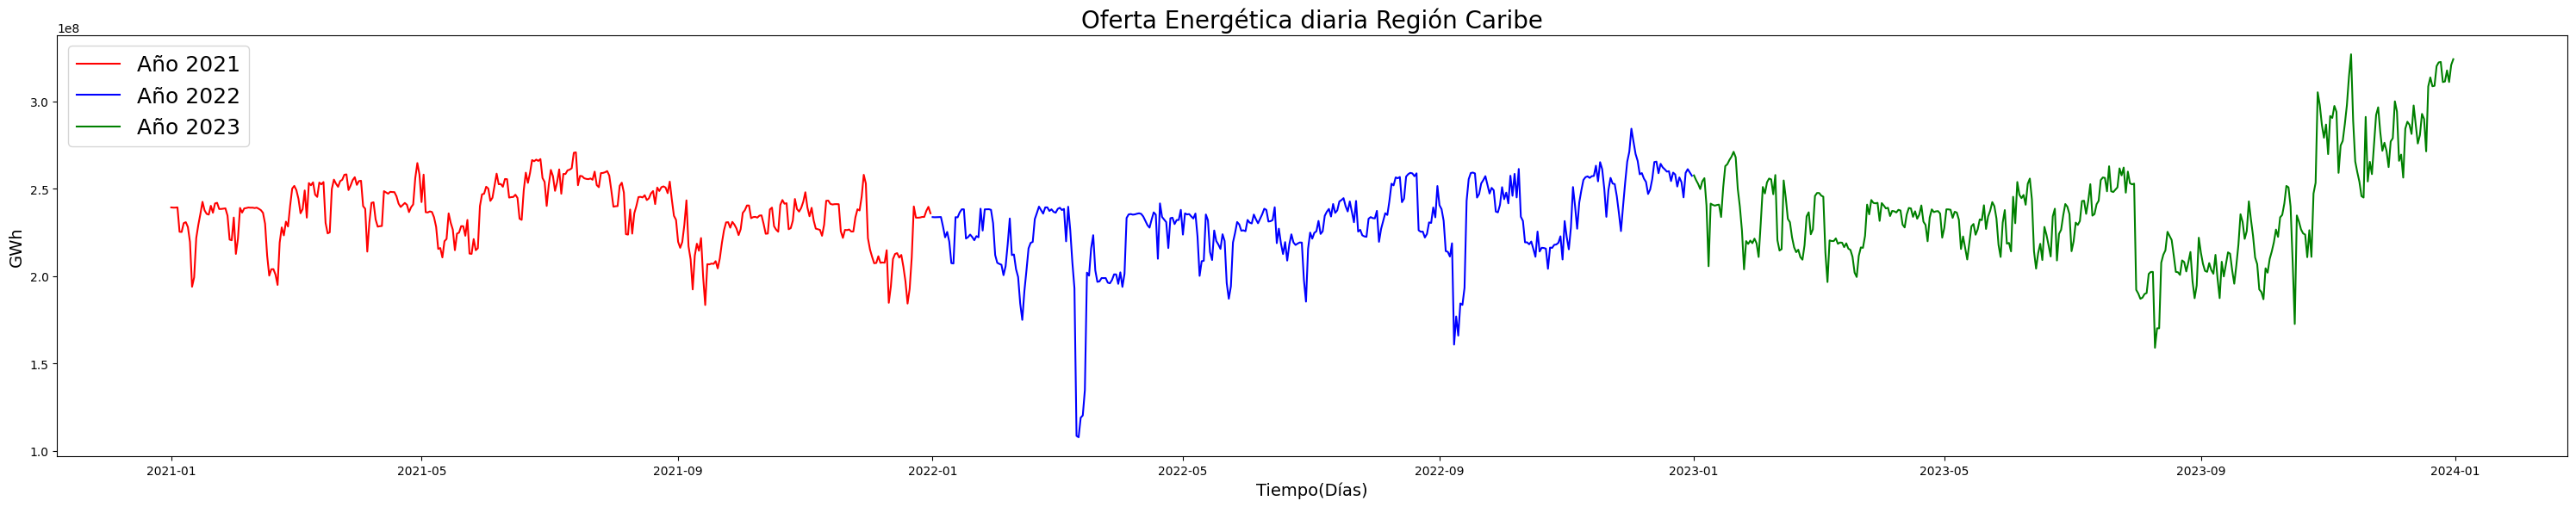

In [14]:
# Crear la figura y el eje
fig, ax = plt.subplots(1,1, figsize=(30, 6))


#for region in regiones_especificas_2021:

ax.plot(fecha_t('2021-01-01','2021-12-31').index, fecha_t('2021-01-01','2021-12-31')['oferta_diaria'], color="r", label='Año 2021')
ax.plot(fecha_t('2022-01-01','2022-12-31').index, fecha_t('2022-01-01','2022-12-31')['oferta_diaria'], color="b", label='Año 2022')
ax.plot(fecha_t('2023-01-01','2023-12-31').index, fecha_t('2023-01-01','2023-12-31')['oferta_diaria'], color="g", label='Año 2023')

# Añadir etiquetas de los ejes
ax.set_xlabel('Tiempo(Días)', fontsize=14)
ax.set_ylabel('GWh', fontsize=14)
# Añadir título al gráfico
ax.set_title('Oferta Energética diaria Región Caribe', fontsize=20)
ax.legend(fontsize=18)
# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [84]:
# Función de filtro de fechas corregida
def fecha_f (ini, fin):
    # Filtrar el DataFrame por el rango de fechas y las regiones específicas
    df_filtrado = df_region_diario[(df_region_diario['Date'] >= ini) & 
                                   (df_region_diario['Date'] <= fin) & 
                                   (df_region_diario['Values_code'].isin(recursos))]

    # Sumar la demanda diaria de ambas regiones en cada fecha
    df_combinado = df_filtrado.groupby('Date')['oferta_diaria'].sum().reset_index()

    # Establecer 'Date' como índice
    df_combinado.set_index('Date', inplace=False)
    
    return df_combinado

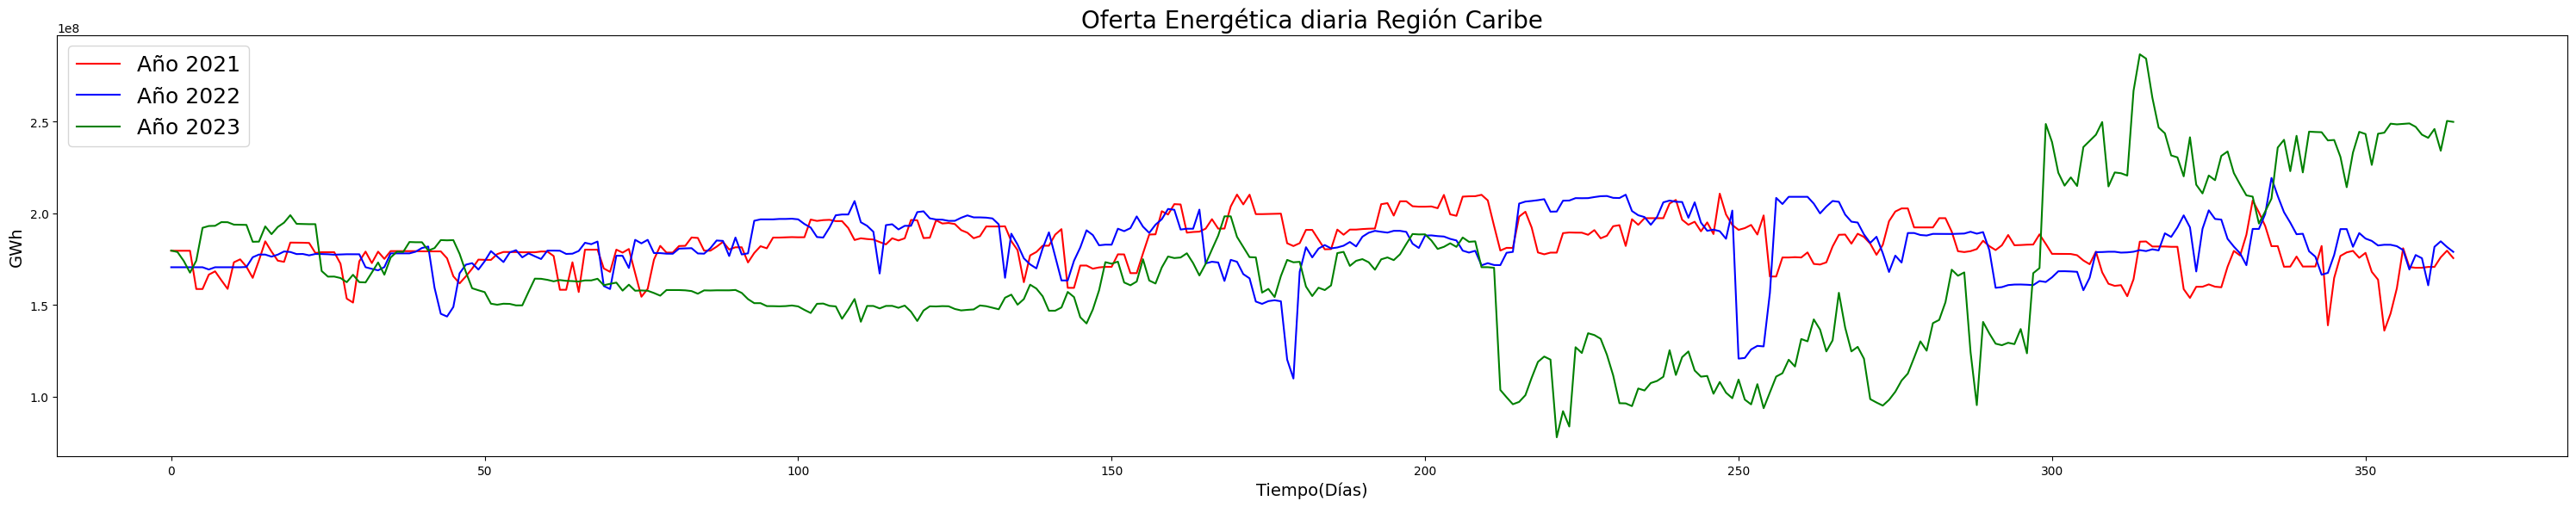

In [85]:
# Crear la figura y el eje
fig, ax = plt.subplots(1,1, figsize=(30, 6))


#for region in regiones_especificas_2021:

ax.plot(fecha_f('2021-01-01','2021-12-31').index, fecha_f('2021-01-01','2021-12-31')['oferta_diaria'], color="r", label='Año 2021')
ax.plot(fecha_f('2022-01-01','2022-12-31').index, fecha_f('2022-01-01','2022-12-31')['oferta_diaria'], color="b", label='Año 2022')
ax.plot(fecha_f('2023-01-01','2023-12-31').index, fecha_f('2023-01-01','2023-12-31')['oferta_diaria'], color="g", label='Año 2023')

# Añadir etiquetas de los ejes
ax.set_xlabel('Tiempo(Días)', fontsize=14)
ax.set_ylabel('GWh', fontsize=14)
# Añadir título al gráfico
ax.set_title('Oferta Energética diaria Región Caribe', fontsize=20)
ax.legend(fontsize=18)
# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

